<a href="https://colab.research.google.com/github/sottohy/Arabic-character-recognition-models/blob/main/Arabic_chrs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score

In [3]:
# Load training & testing data

train_images = pd.read_csv("/content/drive/MyDrive/Arabic-Characters-Recognition/csvTrainImages 13440x1024.csv", header=None).values
train_labels = pd.read_csv("/content/drive/MyDrive/Arabic-Characters-Recognition/csvTrainLabel 13440x1.csv", header=None).values.ravel()

test_images = pd.read_csv("/content/drive/MyDrive/Arabic-Characters-Recognition/csvTestImages 3360x1024.csv", header=None).values
test_labels = pd.read_csv("/content/drive/MyDrive/Arabic-Characters-Recognition/csvTestLabel 3360x1.csv", header=None).values.ravel()


In [4]:
class_names = ['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي']


In [5]:
# Normalization

train_images = train_images / 255
test_images = test_images / 255

In [6]:
# Identifying unique classes & their number
unique_classes, count = np.unique(train_labels, return_counts=True)
number_of_classes = len(unique_classes)
print("Number of unique classes is", number_of_classes)

# Distribution of samples in each class
for i, j in zip(unique_classes, count):
    print(f"Class {i} has {j} samples")

Number of unique classes is 28
Class 1 has 480 samples
Class 2 has 480 samples
Class 3 has 480 samples
Class 4 has 480 samples
Class 5 has 480 samples
Class 6 has 480 samples
Class 7 has 480 samples
Class 8 has 480 samples
Class 9 has 480 samples
Class 10 has 480 samples
Class 11 has 480 samples
Class 12 has 480 samples
Class 13 has 480 samples
Class 14 has 480 samples
Class 15 has 480 samples
Class 16 has 480 samples
Class 17 has 480 samples
Class 18 has 480 samples
Class 19 has 480 samples
Class 20 has 480 samples
Class 21 has 480 samples
Class 22 has 480 samples
Class 23 has 480 samples
Class 24 has 480 samples
Class 25 has 480 samples
Class 26 has 480 samples
Class 27 has 480 samples
Class 28 has 480 samples


In [7]:
# Function to display a sample of 10 images

def display_images(images, true_labels, predicted_labels):
    plt.figure(figsize=(8, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i + 2].reshape(32, 32), cmap='gray')
        true_label = class_names[true_labels[i]]  # Fix indexing here
        predicted_label = class_names[predicted_labels[i]]

        # Check if the true label is not equal to the predicted label
        if true_label != predicted_label:
            plt.title(f'True: {true_label}\nPredicted: {predicted_label}', color='red')
        else:
            plt.title(f'True: {true_label}\nPredicted: {predicted_label}', color='black')

        plt.axis('off')
    plt.show()


Confusion Matrix for SVM:


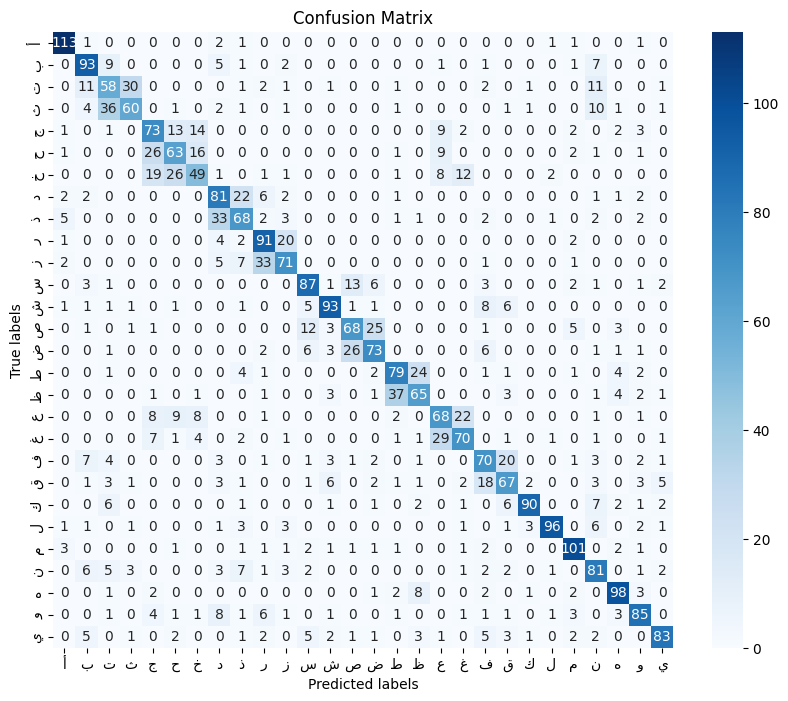

F1 Score for SVM: 0.6530876998602201


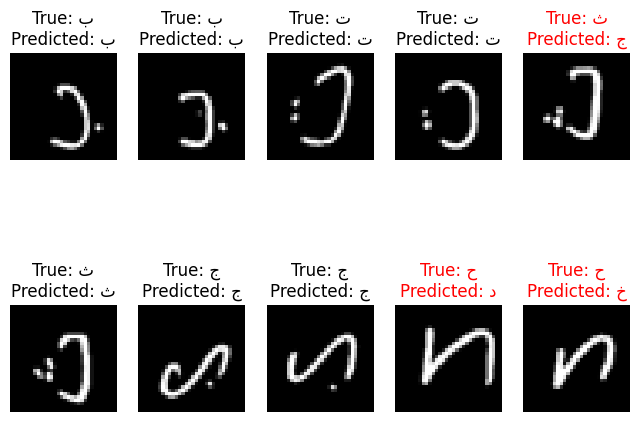

In [10]:
# SVM
import seaborn as sns

# Train the model
model = SVC(kernel="rbf")
model.fit(train_images, train_labels)

# Make predictions
predicted = model.predict(test_images)

# Calculate confusion matrix
svm_conf_matrix = confusion_matrix(test_labels, predicted)
print("Confusion Matrix for SVM:")

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
svm_f1 = f1_score(test_labels, predicted, average='weighted')
print("F1 Score for SVM:", svm_f1)

display_images(test_images, test_labels, predicted)

In [11]:
# Splitting the data

ImgTraining, ImgValidation, LabelTraining, LabelValidation = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

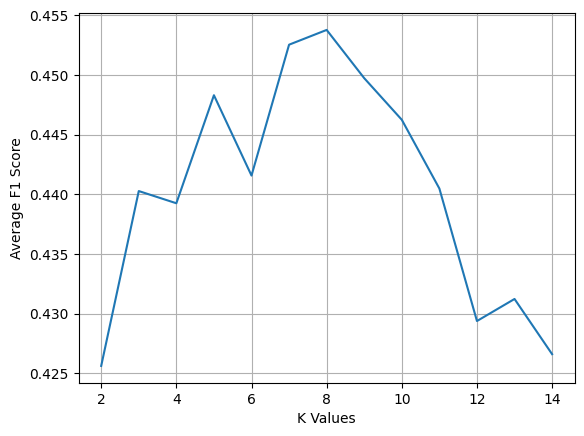


Average Accuracies: 44.85%


In [12]:
# KNN

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

k_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

kF1 = []
total_accuracies = []

for k in k_vals:
    modelknn = KNeighborsClassifier(n_neighbors=k)
    modelknn.fit(ImgTraining, LabelTraining.ravel())
    pred = modelknn.predict(ImgValidation)

    # Calculate accuracy
    accuracy = accuracy_score(LabelValidation.ravel(), pred)
    total_accuracies.append(accuracy)

    # Calculate F1 score
    f1 = f1_score(LabelValidation.ravel(), pred, average='weighted')
    kF1.append(f1)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(LabelValidation.ravel(), pred)

plt.plot(k_vals, kF1)
plt.xlabel('K Values')
plt.ylabel('Average F1 Score')
plt.grid(True)
plt.show()

Average_Accuracies = sum(total_accuracies)/len(total_accuracies)
print()
Average_Accuracies = round(Average_Accuracies * 100, 2)
print(f"Average Accuracies: {Average_Accuracies}%")

Confusion matrix for the best K value:


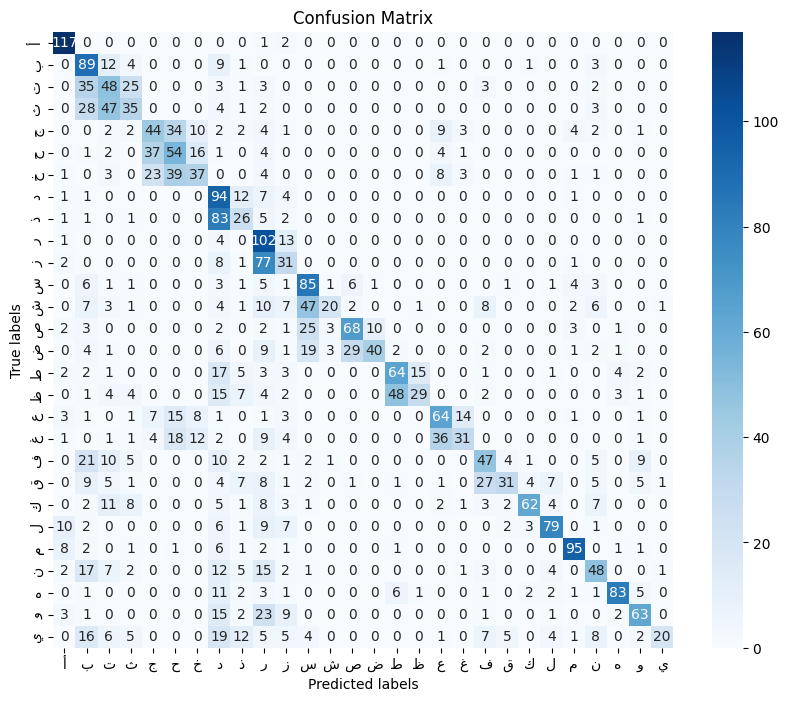

F1 score of KNN: 0.47117361814689473


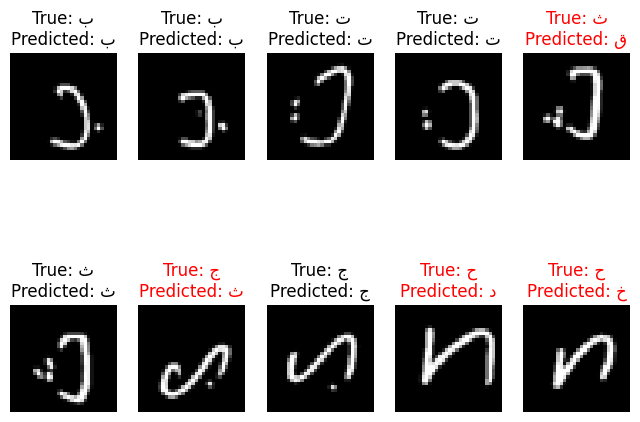

In [14]:
# Testing the KNN model with the best K value

modelknn = KNeighborsClassifier(n_neighbors=8)
modelknn.fit(ImgTraining, LabelTraining.ravel())
pred2 = modelknn.predict(test_images)

knn_conf_matrix = confusion_matrix(test_labels.ravel(), pred2)
print("Confusion matrix for the best K value:")

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


knn_f1 = f1_score(test_labels.ravel(), pred2, average='weighted')
print("F1 score of KNN:", knn_f1)

display_images(test_images, test_labels, pred2)

In [ ]:
# Reshaping
ImgTraining = ImgTraining.reshape((12096, 32, 32, 1))
ImgValidation = ImgValidation.reshape((1344, 32, 32, 1))

# One-hot encode the labels
LabelTraining = tf.keras.utils.to_categorical(LabelTraining - 1, num_classes=number_of_classes)
LabelValidation = tf.keras.utils.to_categorical(LabelValidation - 1, num_classes=number_of_classes)

First Neural Network Model:
Epoch 1/10
378/378 [==============================] - 4s 8ms/step - loss: 2.1336 - accuracy: 0.3401 - val_loss: 1.4988 - val_accuracy: 0.5171
Epoch 2/10
378/378 [==============================] - 2s 5ms/step - loss: 1.1482 - accuracy: 0.6126 - val_loss: 1.0904 - val_accuracy: 0.6287
Epoch 3/10
378/378 [==============================] - 2s 5ms/step - loss: 0.7956 - accuracy: 0.7240 - val_loss: 0.9698 - val_accuracy: 0.6763
Epoch 4/10
378/378 [==============================] - 2s 5ms/step - loss: 0.6048 - accuracy: 0.7885 - val_loss: 0.8843 - val_accuracy: 0.7068
Epoch 5/10
378/378 [==============================] - 2s 5ms/step - loss: 0.4676 - accuracy: 0.8379 - val_loss: 0.9146 - val_accuracy: 0.6949
Epoch 6/10
378/378 [==============================] - 2s 6ms/step - loss: 0.3638 - accuracy: 0.8732 - val_loss: 0.8636 - val_accuracy: 0.7232
Epoch 7/10
378/378 [==============================] - 3s 8ms/step - loss: 0.2903 - accuracy: 0.9000 - val_loss: 0.8641 -

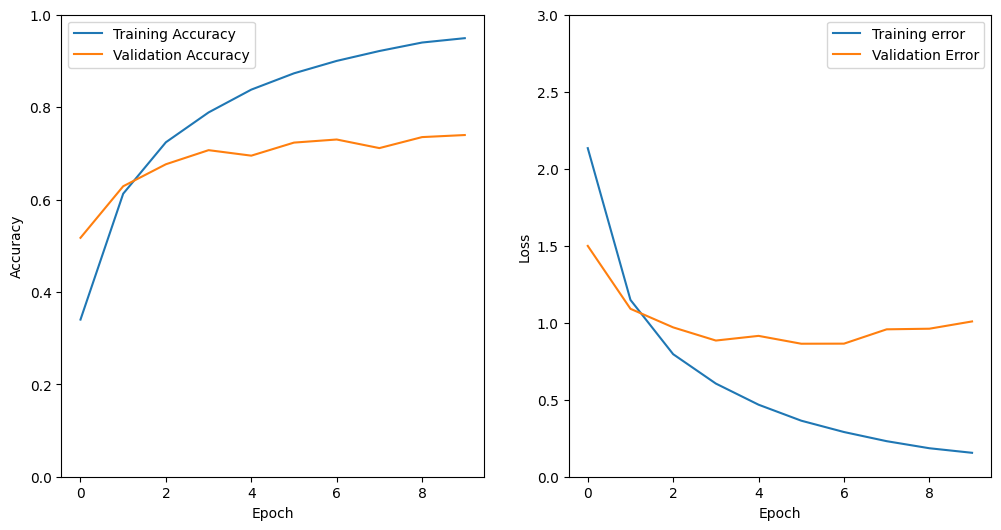

In [15]:
# First Neural network model

model1 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(number_of_classes, activation='softmax')
])

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("First Neural Network Model:")
history1 = model1.fit(ImgTraining, LabelTraining, epochs=10, validation_data=(ImgValidation, LabelValidation))

# Evaluate the model on the test data for model1
test_loss1, test_acc1 = model1.evaluate(ImgValidation, LabelValidation)
test_acc1 = round(test_acc1 * 100, 2)
print('\nTest accuracy for model 1:', test_acc1, "%")

# Plot training accuracy and validation accuracy for model1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])

# Plot training error and validation error for model1
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training error')
plt.plot(history1.history['val_loss'], label='Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 3])
plt.show()


For the CNN Model:
Epoch 1/10
378/378 [==============================] - 24s 57ms/step - loss: 1.5364 - accuracy: 0.5324 - val_loss: 0.7438 - val_accuracy: 0.7671
Epoch 2/10
378/378 [==============================] - 19s 49ms/step - loss: 0.5688 - accuracy: 0.8225 - val_loss: 0.4299 - val_accuracy: 0.8735
Epoch 3/10
378/378 [==============================] - 19s 50ms/step - loss: 0.3482 - accuracy: 0.8944 - val_loss: 0.4126 - val_accuracy: 0.8638
Epoch 4/10
378/378 [==============================] - 20s 53ms/step - loss: 0.2401 - accuracy: 0.9273 - val_loss: 0.3757 - val_accuracy: 0.8765
Epoch 5/10
378/378 [==============================] - 19s 49ms/step - loss: 0.1694 - accuracy: 0.9516 - val_loss: 0.2777 - val_accuracy: 0.9107
Epoch 6/10
378/378 [==============================] - 18s 49ms/step - loss: 0.1183 - accuracy: 0.9691 - val_loss: 0.2857 - val_accuracy: 0.9033
Epoch 7/10
378/378 [==============================] - 18s 49ms/step - loss: 0.0848 - accuracy: 0.9779 - val_loss: 0.2

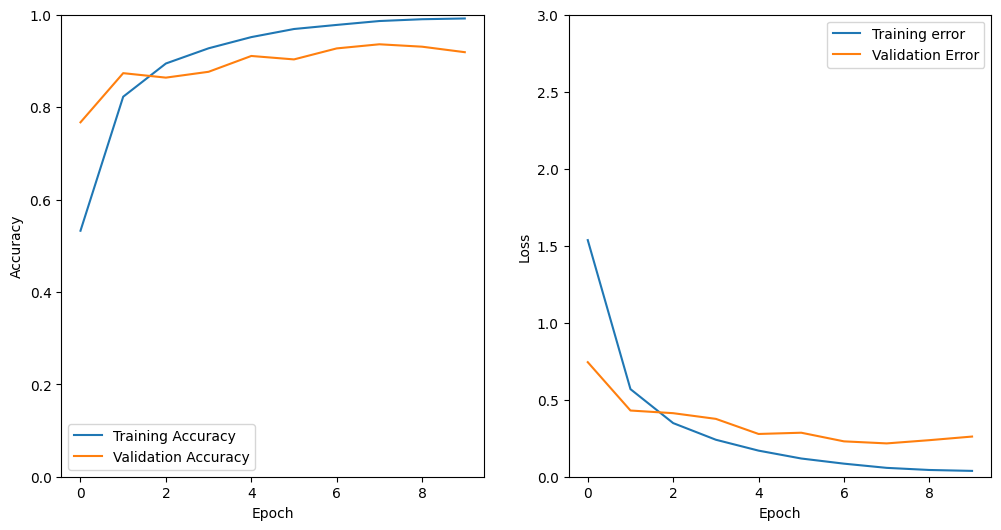

In [17]:
# Second Neural Network model

# CNN model
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(384, activation='sigmoid'),
    layers.Dense(number_of_classes, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("For the CNN Model:")
history_cnn = model_cnn.fit(ImgTraining, LabelTraining, epochs=10, validation_data=(ImgValidation, LabelValidation))

# Evaluate the model on the test data for the CNN model
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(ImgValidation, LabelValidation)
test_acc_cnn = round(test_acc_cnn * 100, 2)
print('\nTest accuracy:', test_acc_cnn, "%")

# Plot training accuracy and validation accuracy for the CNN model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])

# Plot training error and validation error for the CNN model
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training error')
plt.plot(history_cnn.history['val_loss'], label='Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 3])
plt.show()
